In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heber-data-science-spooky-author-classification/sample_submission/sample_submission.csv
/kaggle/input/heber-data-science-spooky-author-classification/test/test.csv
/kaggle/input/heber-data-science-spooky-author-classification/train/train.csv


## Team : R.Newlin Blessy-225229122 ,Yogeshwari.G-225229148

In [134]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk import sent_tokenize, word_tokenize, FreqDist
from nltk.data import load
import nltk
from math import ceil

from pandas import read_csv

from datetime import datetime

from collections import Counter

In [135]:
from wordcloud import STOPWORDS


# Overview of data

In [136]:
df=pd.read_csv("/kaggle/input/heber-data-science-spooky-author-classification/test/test.csv")
df

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...
...,...,...
8387,id11749,All this is now the fitter for my purpose.
8388,id10526,I fixed myself on a wide solitude.
8389,id13477,It is easily understood that what might improv...
8390,id13761,"Be this as it may, I now began to feel the ins..."


In [137]:
df.size

16784

In [138]:
df.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [139]:
df.columns

Index(['id', 'text'], dtype='object')

In [140]:
df.info

<bound method DataFrame.info of            id                                               text
0     id02310  Still, as I urged our leaving Ireland with suc...
1     id24541  If a fire wanted fanning, it could readily be ...
2     id00134  And when they had broken down the frail door t...
3     id27757  While I was thinking how I should possibly man...
4     id04081  I am not sure to what limit his knowledge may ...
...       ...                                                ...
8387  id11749         All this is now the fitter for my purpose.
8388  id10526                 I fixed myself on a wide solitude.
8389  id13477  It is easily understood that what might improv...
8390  id13761  Be this as it may, I now began to feel the ins...
8391  id04282  Long winded, statistical, and drearily genealo...

[8392 rows x 2 columns]>

In [141]:
df1=pd.read_csv("/kaggle/input/heber-data-science-spooky-author-classification/train/train.csv")
df1

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [142]:
df1.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [143]:
df1.size

58737

In [144]:
df1.columns

Index(['id', 'text', 'author'], dtype='object')

In [145]:
df1.info

<bound method DataFrame.info of             id                                               text author
0      id26305  This process, however, afforded me no means of...    EAP
1      id17569  It never once occurred to me that the fumbling...    HPL
2      id11008  In his left hand was a gold snuff box, from wh...    EAP
3      id27763  How lovely is spring As we looked from Windsor...    MWS
4      id12958  Finding nothing else, not even gold, the Super...    HPL
...        ...                                                ...    ...
19574  id17718  I could have fancied, while I looked at it, th...    EAP
19575  id08973  The lids clenched themselves together as if in...    EAP
19576  id05267  Mais il faut agir that is to say, a Frenchman ...    EAP
19577  id17513  For an item of news like this, it strikes us i...    EAP
19578  id00393  He laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 3 columns]>

In [146]:
print(set(df1['author']))

{'HPL', 'EAP', 'MWS'}


In [147]:
np.random.seed(123)
np.random.choice(df1.loc[df1['author']=='EAP','text'])

'You are well aware that chemical preparations exist, and have existed time out of mind, by means of which it is possible to write upon either paper or vellum, so that the characters shall become visible only when subjected to the action of fire.'

In [148]:
np.random.choice(df1.loc[df1['author']=='HPL','text'])

'The pile of tools soon reached, and a hammer and chisel selected, Birch returned over the coffins to the door.'

In [149]:
#Dictionary with Author names for more understandable Plots
author_dict = {
    'EAP': 'Edgar Allan Poe',
    'HPL': 'HP Lovecraft',
    'MWS': 'Mary Shelley'
}

# Processing functions

# Normalization Function

### Normalization over number of words

In [150]:
def normalization_word(var):
    """Returns number of words."""
    words = nltk.Text(word_tokenize(((var))))
    return len(words)

### Normalization by number of Sentences

In [151]:
def normalization_sentence(var):
    """Returns number of sentences."""
    sentences = nltk.Text(sent_tokenize(var))
    return len(sentences)

### Normalization by number of Characters

In [152]:
def normalization_character(var):
    """Returns number of characters."""
    return len(var)

# Cleaning Function

In [153]:
def cleaning(var):
    """Take a string. Returns a string with only lowercase letters and the space between words."""
    plain_string = ""
    for x in var:
        x = x.lower()
        if (('a' <= x and x <= 'z') or x == ' '):
            plain_string += x
        elif x == '\'': # any apostrophes(') are replaced by a space 
            plain_string += ' '
    while '  ' in plain_string: # any multiple spaces are replaced by a single space
        plain_string = plain_string.replace('  ', ' ')
    return plain_string

# Creation of the dataframes

In [154]:
# just a test cell
df = df1['text'][0]
df

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

### Word Clouds

In [155]:
# full text from the authors as an array
eap = df1[df1.author=="EAP"]["text"].values
hpl = df1[df1.author=="HPL"]["text"].values
mws = df1[df1.author=="MWS"]["text"].values

# full text from the authors as a string
eap_s = " ".join(eap)
hpl_s = " ".join(hpl)
mws_s = " ".join(mws)

# full PLAIN text (i.e. no capital and punctuation) from the authors as a string
eap_s_c = cleaning(eap_s)
hpl_s_c = cleaning(hpl_s)
mws_s_c = cleaning(mws_s)

In [156]:
'''
# Read the whole text
list_text = [eap_s_c, hpl_s_c, mws_s_c]

# read the mask image
# taken from http://www.stencilry.org/
eap_mask = np.array(Image.open("eap_mask.jpg"))
hpl_mask = np.array(Image.open("hpl_mask.jpg"))
mws_mask = np.array(Image.open("mws_mask.jpg"))
list_mask = [eap_mask, hpl_mask, mws_mask]

stopwords = set(STOPWORDS)

for i in range(3):
    wc = WordCloud(background_color="white", max_words=2000, mask=list_mask[i],
                   stopwords=stopwords)
    # generate word cloud
    wc.generate(list_text[i])
    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Wordcloud of author ' + author_list[i])
    plt.axis("off")
    plt.figure()
    # store to file
    wc.to_file("{}_wordcloud.png".format(author_list[i]))
    
plt.show()
'''

'\n# Read the whole text\nlist_text = [eap_s_c, hpl_s_c, mws_s_c]\n\n# read the mask image\n# taken from http://www.stencilry.org/\neap_mask = np.array(Image.open("eap_mask.jpg"))\nhpl_mask = np.array(Image.open("hpl_mask.jpg"))\nmws_mask = np.array(Image.open("mws_mask.jpg"))\nlist_mask = [eap_mask, hpl_mask, mws_mask]\n\nstopwords = set(STOPWORDS)\n\nfor i in range(3):\n    wc = WordCloud(background_color="white", max_words=2000, mask=list_mask[i],\n                   stopwords=stopwords)\n    # generate word cloud\n    wc.generate(list_text[i])\n    # show\n    plt.imshow(wc, interpolation=\'bilinear\')\n    plt.title(\'Wordcloud of author \' + author_list[i])\n    plt.axis("off")\n    plt.figure()\n    # store to file\n    wc.to_file("{}_wordcloud.png".format(author_list[i]))\n    \nplt.show()\n'

# Splitting the training set.

In [157]:
t0 = df1.copy()

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
tr1, ts1 = train_test_split(t0, test_size=20/80)
# 20% to tr1 and 80% to ts1

print(len(t0))
print(len(tr1))
print(len(ts1))
print(len(tr1) / len(t0))
print(len(ts1) / len(t0))
print((len(tr1) / len(t0)) + (len(ts1) / len(t0)))

19579
14684
4895
0.7499872312171204
0.2500127687828796
1.0


In [160]:
tr1.head()

,id,text,author
14759,id23017,"""Long have I missed thee, Aira, for I was but ...",HPL
8527,id19417,"This panorama is indeed glorious, and I should...",EAP
6629,id06550,Men usually grow base by degrees.,EAP
7095,id03841,"Now you yourself, my dearest Eugenie, can have...",EAP
6011,id06456,"I s'pose it's cheap enough, but I never see mo...",HPL


In [161]:
ts1.head()

,id,text,author
11090,id21412,"Having done all this in a neat speech, I took ...",EAP
9120,id26386,An advanced guard gave information of our appr...,MWS
18437,id23355,"So, at least I thought: but I had not counted ...",EAP
5851,id01085,A sort of mad eyed monstrosity behind the lead...,HPL
13599,id07451,"Surveying the conditions, I chose the more sou...",HPL


# Feature Engineering

### Meta Features

### Average sentence length (in characters)

In [162]:
def length_character(var):
    """Takes a string returns an int (average sentence length in characters)."""
    return len(var) / normalization_sentence(var)

### Average sentence length (in words)

In [163]:
def length_sentence(var):
    """Takes a string and returns an int (average sentence length in words)."""
    return len(var.split()) / normalization_sentence(var)

### Average characters per word

In [164]:
def length_word(var):
    """Takes a string and returns an int (average characters per word). Excludes punctuations."""
    return len(var.split()) / normalization_word(var)

## Text length

In [165]:
from sklearn.base import TransformerMixin, BaseEstimator
class FeatureExtractionClass(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

class TextLength(FeatureExtractionClass):
    def transform(self, X, y=None):
        return np.array(X['text_length'])[:,np.newaxis]

## Percentage of unique words per sentence

In [166]:
def vocabulary_sentence(var):
    """Takes a string and returns the ratio of different words to all words."""
    var = nltk.Text(sent_tokenize(var))
    vocabulary_list = []
    for c in var:
        if normalization_word(c) != 0:
            vacabulary_count_sentence = len({x.lower() for x in word_tokenize(cleaning(c))})
            vocabulary_list.append(vacabulary_count_sentence / normalization_word(c))
    return np.mean(vocabulary_list)

In [167]:
# just a test cell

vocabulary_sentence("Wow, this is a bad one. On Macs running the latest version of High Sierra (10.13.1 (17B48)), it appears that anyone can log" )

0.7386363636363636

# Sentiment Analysis

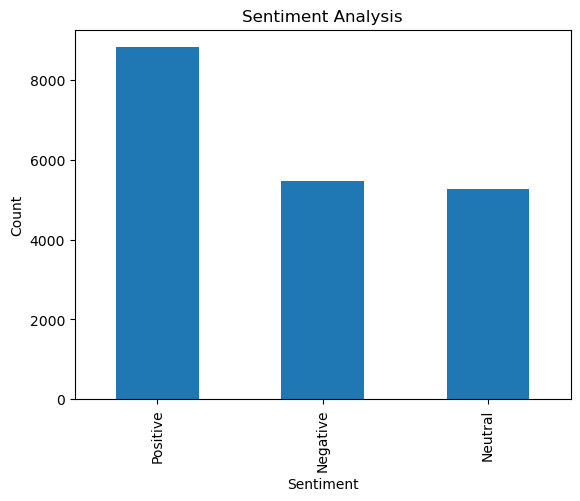

In [168]:
from textblob import TextBlob

# Define a function to calculate the sentiment of a text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment analysis function to the text data
df1["sentiment"] = df1["text"].apply(get_sentiment)

# Count the number of texts with each sentiment
sentiment_counts = df1["sentiment"].value_counts()

# Plot a bar chart of the sentiment counts
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# Punctuation

In [169]:
sample_txt=df1['text'][123]
print(sample_txt)

They had received orders that if I were again taken, I should be brought to the Earl; and his lenity made them expect a conclusion which they considered ill befitting my crime.


In [170]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Tokenization

In [171]:
from nltk.tokenize import RegexpTokenizer
qword_tokenizer = RegexpTokenizer(r'\w+')
words = qword_tokenizer.tokenize(sample_txt)
print(words)

['They', 'had', 'received', 'orders', 'that', 'if', 'I', 'were', 'again', 'taken', 'I', 'should', 'be', 'brought', 'to', 'the', 'Earl', 'and', 'his', 'lenity', 'made', 'them', 'expect', 'a', 'conclusion', 'which', 'they', 'considered', 'ill', 'befitting', 'my', 'crime']


In [172]:
print(qword_tokenizer.tokenize("I can't do it"))

['I', 'can', 't', 'do', 'it']


# Number of words in text

In [173]:
class CountWords(FeatureExtractionClass):
    def transform(self, X, y=None):
        #return np.array(data['nwords'])[:,np.newaxis]
        return np.array([len(qword_tokenizer.tokenize(txt)) for txt in X['text']])
CountWords().transform(df1)

array([41, 14, 36, ..., 13, 15, 22])

In [174]:
import matplotlib.pyplot as plt

# Stop words

In [175]:
import nltk
from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))
list(eng_stopwords)[:10]

['further',
 's',
 'that',
 'hers',
 'as',
 'my',
 'haven',
 'you',
 'themselves',
 'once']

# Stopword percentage

In [176]:
def density_stopword(var):
    """Takes a string and returns the ratio of stopwords to all words."""
    cs = 0
    for x in nltk.Text(word_tokenize(var)):
        if x in STOPWORDS:
            cs += 1
    return cs/normalization_word(var)

## Noun Density

In [177]:
def density_noun(var):
    """Takes a string and returns the ratio of nouns to all words."""
    l = []
    for x in nltk.pos_tag(word_tokenize(var)):
        if x[1][0:2] == 'NN': # all noun tags start with NN
            l.append(x)
    return len(l)/normalization_word(var)

# Feminine and Masculine Words

In [178]:
def count_fem(var):
    """Takes a string and returns the count of feminine words."""
    fem_words = 'she her woman herself girl women lady queen princess daughter madam madame wife'.split()
    fem_count = 0
    var = cleaning(var)
    for word in var.split():
        if word in fem_words:
            fem_count += 1
    return fem_count

In [179]:
def count_mas(var):
    """Takes a string and returns the count of masculine words."""
    mas_words = 'he his man mr himself boy men gentleman gentlemen king prince son sir husband'.split()
    mas_count = 0
    var = cleaning(var)
    for word in var.split():
        if word in mas_words:
            mas_count += 1
    return mas_count

In [180]:
def fem_to_mas_ratio(var):
    """Takes a string and returns the ratio of feminine words to masculine words."""
    fem_count = count_fem(var)
    mas_count = count_mas(var)
    if fem_count and not mas_count:
        fem_mas_ratio = 1
    elif not fem_count and not mas_count:
        fem_mas_ratio = 0
    else:
        fem_mas_ratio = fem_count / mas_count
    return fem_mas_ratio

In [181]:
df = pd.DataFrame([['EAP', eap_s], ['HPL', hpl_s], ['MWS', mws_s]])
df.columns = ['author', 'text']
df

,author,text
0,EAP,"This process, however, afforded me no means of..."
1,HPL,It never once occurred to me that the fumbling...
2,MWS,How lovely is spring As we looked from Windsor...


In [182]:
'''
for c in df.columns[2:]:
    plt.style.use('seaborn')
    sns.barplot(x='author', y=c, data=df)
    plt.title('Meta {}'.format(c))
    plt.savefig('Meta {}'.format(c))
    plt.show()
'''

"\nfor c in df.columns[2:]:\n    plt.style.use('seaborn')\n    sns.barplot(x='author', y=c, data=df)\n    plt.title('Meta {}'.format(c))\n    plt.savefig('Meta {}'.format(c))\n    plt.show()\n"

In [183]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fem_words = 'her she herself girl woman lady queen daughter madam madame wife women princess'.split()

plt.suptitle('Normalized Feminine Word Count', y=1.02)

xlmt = 0
for auth in [(eap_s_c, 'EAP'), (hpl_s_c, 'HPL'), (mws_s_c, 'MWS')]:
    for word in fem_words:
        norm_count = auth[0].count(word) / len(train[train.author == auth[1]])
        if norm_count > xlmt:
            xlmt = norm_count

for ax in ((ax1, eap_s_c, 'darkblue', 'EAP'), (ax2, hpl_s_c, 'darkgreen', 'HPL'), (ax3, mws_s_c, 'darkred', 'MWS')):
    y = np.arange(len(fem_words))
    x = [ax[1].count(word) / len(train[train.author == ax[3]]) for word in fem_words]
    ax[0].barh(y, x, align='center',
            color=ax[2], ecolor='black')
    ax[0].set_yticks(y)
    ax[0].set_yticklabels(fem_words)
    ax[0].invert_yaxis()
    ax[0].set_title(ax[3])
    ax[0].set_xlim([0, xlmt])
    
plt.tight_layout()
plt.savefig('Meta feminine word count')
plt.show()
'''

"\nfig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)\nfem_words = 'her she herself girl woman lady queen daughter madam madame wife women princess'.split()\n\nplt.suptitle('Normalized Feminine Word Count', y=1.02)\n\nxlmt = 0\nfor auth in [(eap_s_c, 'EAP'), (hpl_s_c, 'HPL'), (mws_s_c, 'MWS')]:\n    for word in fem_words:\n        norm_count = auth[0].count(word) / len(train[train.author == auth[1]])\n        if norm_count > xlmt:\n            xlmt = norm_count\n\nfor ax in ((ax1, eap_s_c, 'darkblue', 'EAP'), (ax2, hpl_s_c, 'darkgreen', 'HPL'), (ax3, mws_s_c, 'darkred', 'MWS')):\n    y = np.arange(len(fem_words))\n    x = [ax[1].count(word) / len(train[train.author == ax[3]]) for word in fem_words]\n    ax[0].barh(y, x, align='center',\n            color=ax[2], ecolor='black')\n    ax[0].set_yticks(y)\n    ax[0].set_yticklabels(fem_words)\n    ax[0].invert_yaxis()\n    ax[0].set_title(ax[3])\n    ax[0].set_xlim([0, xlmt])\n    \nplt.tight_layout()\nplt.savefig('Meta feminine word c

In [184]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
mas_words = 'he his men man king son himself mr boy gentleman prince sir gentlemen husband mister'.split()

plt.suptitle('Normalized Masculine Word Count', y=1.02)

xlmt = 0
for auth in [(eap_s_c, 'EAP'), (hpl_s_c, 'HPL'), (mws_s_c, 'MWS')]:
    for word in mas_words:
        norm_count = auth[0].count(word) / len(train[train.author == auth[1]])
        if norm_count > xlmt:
            xlmt = norm_count
            
for ax in ((ax1, eap_s_c, 'darkblue', 'EAP'), (ax2, hpl_s_c, 'darkgreen', 'HPL'), (ax3, mws_s_c, 'darkred', 'MWS')):
    y = np.arange(len(mas_words))
    x = [ax[1].count(word) / len(train[train.author == ax[3]]) for word in mas_words]
    ax[0].barh(y, x, align='center',
            color=ax[2], ecolor='black')
    ax[0].set_yticks(y)
    ax[0].set_yticklabels(mas_words)
    ax[0].invert_yaxis()
    ax[0].set_title(ax[3])
    ax[0].set_xlim([0, xlmt])
    
plt.tight_layout()
plt.savefig('Meta masculine word count')
plt.show()
'''

"\nfig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)\nmas_words = 'he his men man king son himself mr boy gentleman prince sir gentlemen husband mister'.split()\n\nplt.suptitle('Normalized Masculine Word Count', y=1.02)\n\nxlmt = 0\nfor auth in [(eap_s_c, 'EAP'), (hpl_s_c, 'HPL'), (mws_s_c, 'MWS')]:\n    for word in mas_words:\n        norm_count = auth[0].count(word) / len(train[train.author == auth[1]])\n        if norm_count > xlmt:\n            xlmt = norm_count\n            \nfor ax in ((ax1, eap_s_c, 'darkblue', 'EAP'), (ax2, hpl_s_c, 'darkgreen', 'HPL'), (ax3, mws_s_c, 'darkred', 'MWS')):\n    y = np.arange(len(mas_words))\n    x = [ax[1].count(word) / len(train[train.author == ax[3]]) for word in mas_words]\n    ax[0].barh(y, x, align='center',\n            color=ax[2], ecolor='black')\n    ax[0].set_yticks(y)\n    ax[0].set_yticklabels(mas_words)\n    ax[0].invert_yaxis()\n    ax[0].set_title(ax[3])\n    ax[0].set_xlim([0, xlmt])\n    \nplt.tight_layout()\nplt.savefig('Me

# Counting of words (a.k.a bag of words)

In [185]:
def transform_tag(var):
    """Transforms a string to a string of pos_tag"""
    inpt = nltk.pos_tag(word_tokenize(var))
    unzipped = zip(*inpt )
    return ' '.join([*list(unzipped)[1]])


## Generation of the tf_idf counting dataFrame

In [186]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [187]:
def counting_a(a, analysis):
    """
    Generates the tf-idf counting dataframe. First argument is the n of n-gram. Analysis type is 'word', 'char',
    token_pos', etc.
    """
    df1 = tr1.copy()
    df= ts1.copy()
    
    #if we are counting words:
    if analysis == "word" or analysis == "char": 
        
        #check the CountVectorizer doc
        #we create a Countvectorizer, called bow_transformer
        bow_transformer = CountVectorizer(analyzer = analysis,
                                      lowercase = True, #we don't care about place in sentence
                                      ngram_range = (a, a),
                                      stop_words='english')

        #we use bow_transformer to fit and transform our training set
        messages_bow = bow_transformer.fit_transform(df1['text'])
        
        #we use bow_transformer to transform our test set. 
        #We do not need to train if first because the fitting would recompute the idf, we don't want that
        messages_bow_test = bow_transformer.transform(df['text'])
    
    #if we are counting POS:    
    elif analysis == "token_pos":
        
        #this is the punctuation we want to keep
        punctuation = r"(?u)\b\w\w+\b|!|\?|\"|\'|\.|\,|\;|\:|\$|\(|\)|\--|\&|\``|\'' + PRP$ + WP$"
        #we create a Countvectorizer, called bow_transformer
        bow_transformer = CountVectorizer(analyzer = 'word',
                                          lowercase = False, #we DO care about place in sentence
                                          ngram_range = (a, a),
                                          token_pattern =  punctuation, #we DO care about punctuation
                                          stop_words='english')
        
        #we use the transform_tag function to transform the sentence in a sentence of pos tag        
        #we use bow_transformer to fit and transform our training set
        messages_bow = bow_transformer.fit_transform(df1['text'].apply(transform_tag))
        #we use bow_transformer to transform our test set
        #We do not need to train if first because the fitting would recompute the idf, we don't want that
        messages_bow_test = bow_transformer.transform(df['text'].apply(transform_tag))

        
    #this is the DataFrame Concerning the regular counting of words
    
    ##from regular counting to tf idf transformation coefficient

    tfidf_transformer = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    messages_tfidf_test = tfidf_transformer.transform(messages_bow_test)
    
    names = bow_transformer.get_feature_names()
    
    return (messages_tfidf, names, messages_tfidf_test)

In [188]:
#mat_word, name_word, mat_word_test = counting_a(2,'word')
mat_word, name_word, mat_word_test = counting_a(2,'word')

print ('Shape of Sparse Matrix: ', mat_word.shape)
print ('Amount of Non-Zero occurences: ', mat_word.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_word.nnz /
                             (mat_word.shape[0] * mat_word.shape[1])))
       
print(' ')
print ('Shape of Sparse Matrix Test: ', mat_word_test.shape)
print ('Amount of Non-Zero occurences: ', mat_word_test.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_word_test.nnz /
                             (mat_word_test.shape[0] * mat_word_test.shape[1])))
                             

Shape of Sparse Matrix:  (14684, 143584)
Amount of Non-Zero occurences:  154436
sparsity: 0.01%
 
Shape of Sparse Matrix Test:  (4895, 143584)
Amount of Non-Zero occurences:  5940
sparsity: 0.00%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Counting of Character (a.k.a bag of character)

## Generation of the tf-idf counting dataFrame

In [189]:
mat_char, name_char, mat_char_test = counting_a(3, 'char')

print ('Shape of Sparse Matrix: ', mat_char.shape)
print ('Amount of Non-Zero occurences: ', mat_char.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_char.nnz /
                             (mat_char.shape[0] * mat_char.shape[1])))
print(' ')
print ('Shape of Sparse Matrix Test: ', mat_char_test.shape)
print ('Amount of Non-Zero occurences: ', mat_char_test.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_char_test.nnz /
                             (mat_char_test.shape[0] * mat_char_test.shape[1])))

Shape of Sparse Matrix:  (14684, 8637)
Amount of Non-Zero occurences:  1819818
sparsity: 1.43%
 
Shape of Sparse Matrix Test:  (4895, 8637)
Amount of Non-Zero occurences:  602489
sparsity: 1.43%


# Counting of POS Tag (a.k.a bag of Tag)

In [190]:
#nltk.download('tagsets')
tagdict = load('help/tagsets/upenn_tagset.pickle')
#list of all the possible tag names
print("|\\".join(list(tagdict)))

#this is the list of the different tokens we will use.
len(tagdict)

LS|\TO|\VBN|\''|\WP|\UH|\VBG|\JJ|\VBZ|\--|\VBP|\NN|\DT|\PRP|\:|\WP$|\NNPS|\PRP$|\WDT|\(|\)|\.|\,|\``|\$|\RB|\RBR|\RBS|\VBD|\IN|\FW|\RP|\JJR|\JJS|\PDT|\MD|\VB|\WRB|\NNP|\EX|\NNS|\SYM|\CC|\CD|\POS


45

## Generation of the tf-idf counting dataFrame

In [191]:
mat_pos, name_pos, mat_pos_test = counting_a(4, 'token_pos')

print ('Shape of Sparse Matrix: ', mat_pos.shape)
print ('Amount of Non-Zero occurences: ', mat_pos.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_pos.nnz /
                             (mat_pos.shape[0] * mat_pos.shape[1])))

print ('Shape of Sparse Test Matrix: ', mat_pos_test.shape)
print ('Amount of Non-Zero occurences: ', mat_pos_test.nnz)
print ('sparsity: %.2f%%' % (100.0 * mat_pos_test.nnz /
                             (mat_pos_test.shape[0] * mat_pos_test.shape[1])))

Shape of Sparse Matrix:  (14684, 51924)
Amount of Non-Zero occurences:  406850
sparsity: 0.05%
Shape of Sparse Test Matrix:  (4895, 51924)
Amount of Non-Zero occurences:  125737
sparsity: 0.05%


In [192]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Preprocess text

In [193]:

vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df1['text'])
X_test = vectorizer.transform(df['text'])

In [194]:
X_train

<19579x24764 sparse matrix of type '<class 'numpy.int64'>'
	with 220471 stored elements in Compressed Sparse Row format>

In [195]:
X_test

<3x24764 sparse matrix of type '<class 'numpy.int64'>'
	with 40412 stored elements in Compressed Sparse Row format>

## cross-validation

## Ensemble method

In [199]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train and evaluate model
rfc.fit(X_train, y_train)
score = rfc.score(X_test,y_pred)
print('Random forest score:', score)


ValueError: Found input variables with inconsistent numbers of samples: [19579, 12530]

# Feature Engineering

In [200]:
df1['text_length'] = df1['text'].apply(len)
df1['unique_words'] = df1['text'].apply(lambda x: len(set(x.split())))
df1['has_horror'] = df1['text'].apply(lambda x: 1 if 'horror' in x else 0)

# Preprocess text
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df1[['text', 'text_length', 'unique_words', 'has_horror']])
print(X_train)
print(df1['has_horror'])

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
0        0
1        0
2        0
3        0
4        0
        ..
19574    0
19575    0
19576    0
19577    0
19578    0
Name: has_horror, Length: 19579, dtype: int64


# Feature selection

In [201]:
from sklearn.feature_selection import SelectKBest, chi2

### Perform chi-squared feature selection

In [205]:
k = 1000 # number of features to select
selector = SelectKBest(chi2, k='all')
print(len(df1['author']))
selector.fit(X_train, df1['author'][:X_train.shape[0]])
selector.fit(X_train, df1['author'][:X_train.shape[0]])

19579


SelectKBest(k='all', score_func=<function chi2 at 0x7fd6bd50d8c0>)

In [206]:
selected_features = selector.get_support(indices=True)
feature_names = vectorizer.get_feature_names()
selected_feature_names = [feature_names[i] for i in selected_features]
pd.DataFrame(selected_feature_names, columns=['feature_name']).to_csv('selected_features.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Define target variable

In [207]:
y_train = df1['author']
y_train

0        EAP
1        HPL
2        EAP
3        MWS
4        HPL
        ... 
19574    EAP
19575    EAP
19576    EAP
19577    EAP
19578    HPL
Name: author, Length: 19579, dtype: object

# Evaluate model

In [214]:
accuracy = accuracy_score(df['author'], y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


<AxesSubplot:xlabel='author', ylabel='count'>

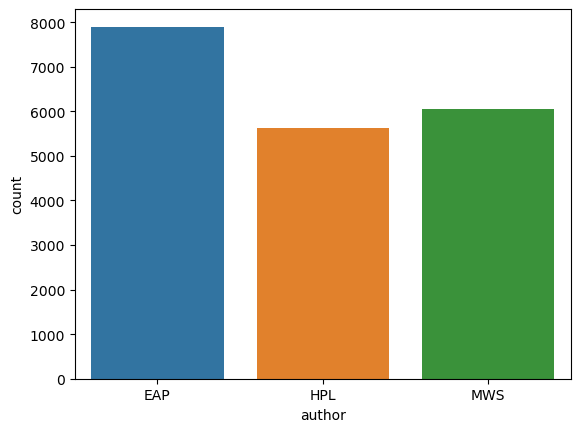

In [215]:
import seaborn as sns

sns.countplot(x='author', data=df1)


# WordCloud

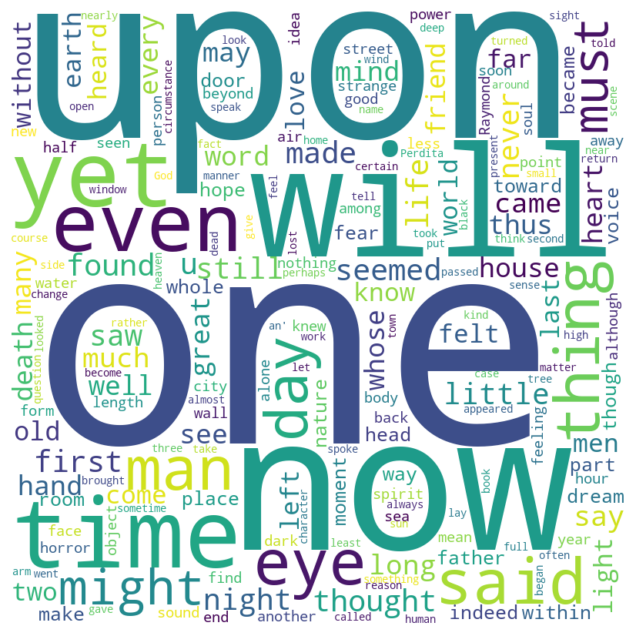

In [216]:
from wordcloud import WordCloud

text = ' '.join(df1['text'].tolist())

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Scatter plot

Text(0, 0.5, 'PC2')

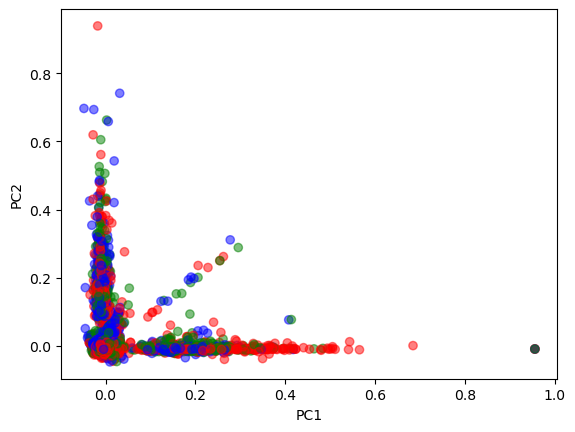

In [217]:
# Define a mapping of author names to colors
color_map = {'EAP': 'red', 'HPL': 'blue', 'MWS': 'green'}

# Convert the author names to colors
colors = [color_map[author] for author in df1['author']]

# Plot the scatter plot with the new colors
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')


# Hyperparameter

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Define pipeline for preprocessing and modeling
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=5000))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}



# Sample Submission

In [219]:
sample = pd.read_csv("/kaggle/input/heber-data-science-spooky-author-classification/sample_submission/sample_submission.csv")
sample

,id,EAP,HPL,MWS
0,id02310,0.403494,0.287808,0.308698
1,id24541,0.403494,0.287808,0.308698
2,id00134,0.403494,0.287808,0.308698
3,id27757,0.403494,0.287808,0.308698
4,id04081,0.403494,0.287808,0.308698
...,...,...,...,...
8387,id11749,0.403494,0.287808,0.308698
8388,id10526,0.403494,0.287808,0.308698
8389,id13477,0.403494,0.287808,0.308698
8390,id13761,0.403494,0.287808,0.308698


In [220]:
result = sample[['id', 'EAP', 'HPL', 'MWS']]


In [221]:
result.to_csv("submission.csv", index=False)
 